# Treść zadania

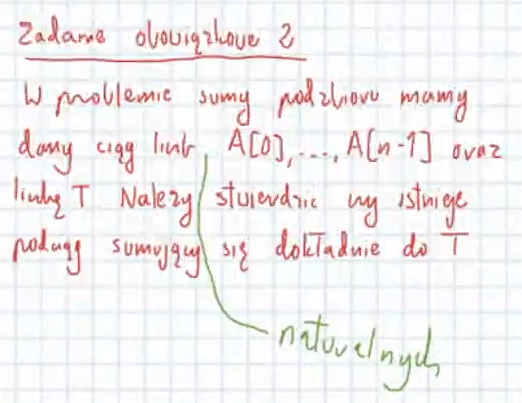

### Omówienie algorytmu

Ponieważ ma to być podciąg, ale nie musi być spójny, nie możemy rozwiązać tego problemu w czasie liniowym. Zauważmy, że ten problem nieco przypomina problem plecakowy, ale zamiast plecaka mamy liczbę $ T $, a zamiast wag i profitów mamy po prostu tablicę wartości. W tej sytuacji tablicę liczb naturalnych $ A $, w której mamy znaleźć podciąg, traktujemy jako zarówno profity jak i wagi. Wynika to z faktu, iż wzięcie pewnej liczby $ A[i] $ powoduje, że pozostała suma, jaką musimy znaleźć zmniejsza się o $ A[i] $ (tak jakby zmniejszał się pozostały udźwig plecaka o wagę danego przedmiotu, ale jednocześnie zyskujemy również profit o wartości $ A[i] $, bo nasza suma jest bliższa szukanej sumie). <br><br>
Wystarczy zatem utworzyć tablicę o liczbie kolumn równej szukanej liczbie $ T $ (plus 1, bo suma może być równa 0 - uznajemy, że 0 też jest liczbą naturalną) oraz liczbie wierszy równej liczbie wartości w tablicy $ A $. Następnie wypełniamy tablicę podobnie do problemu plecakowego/

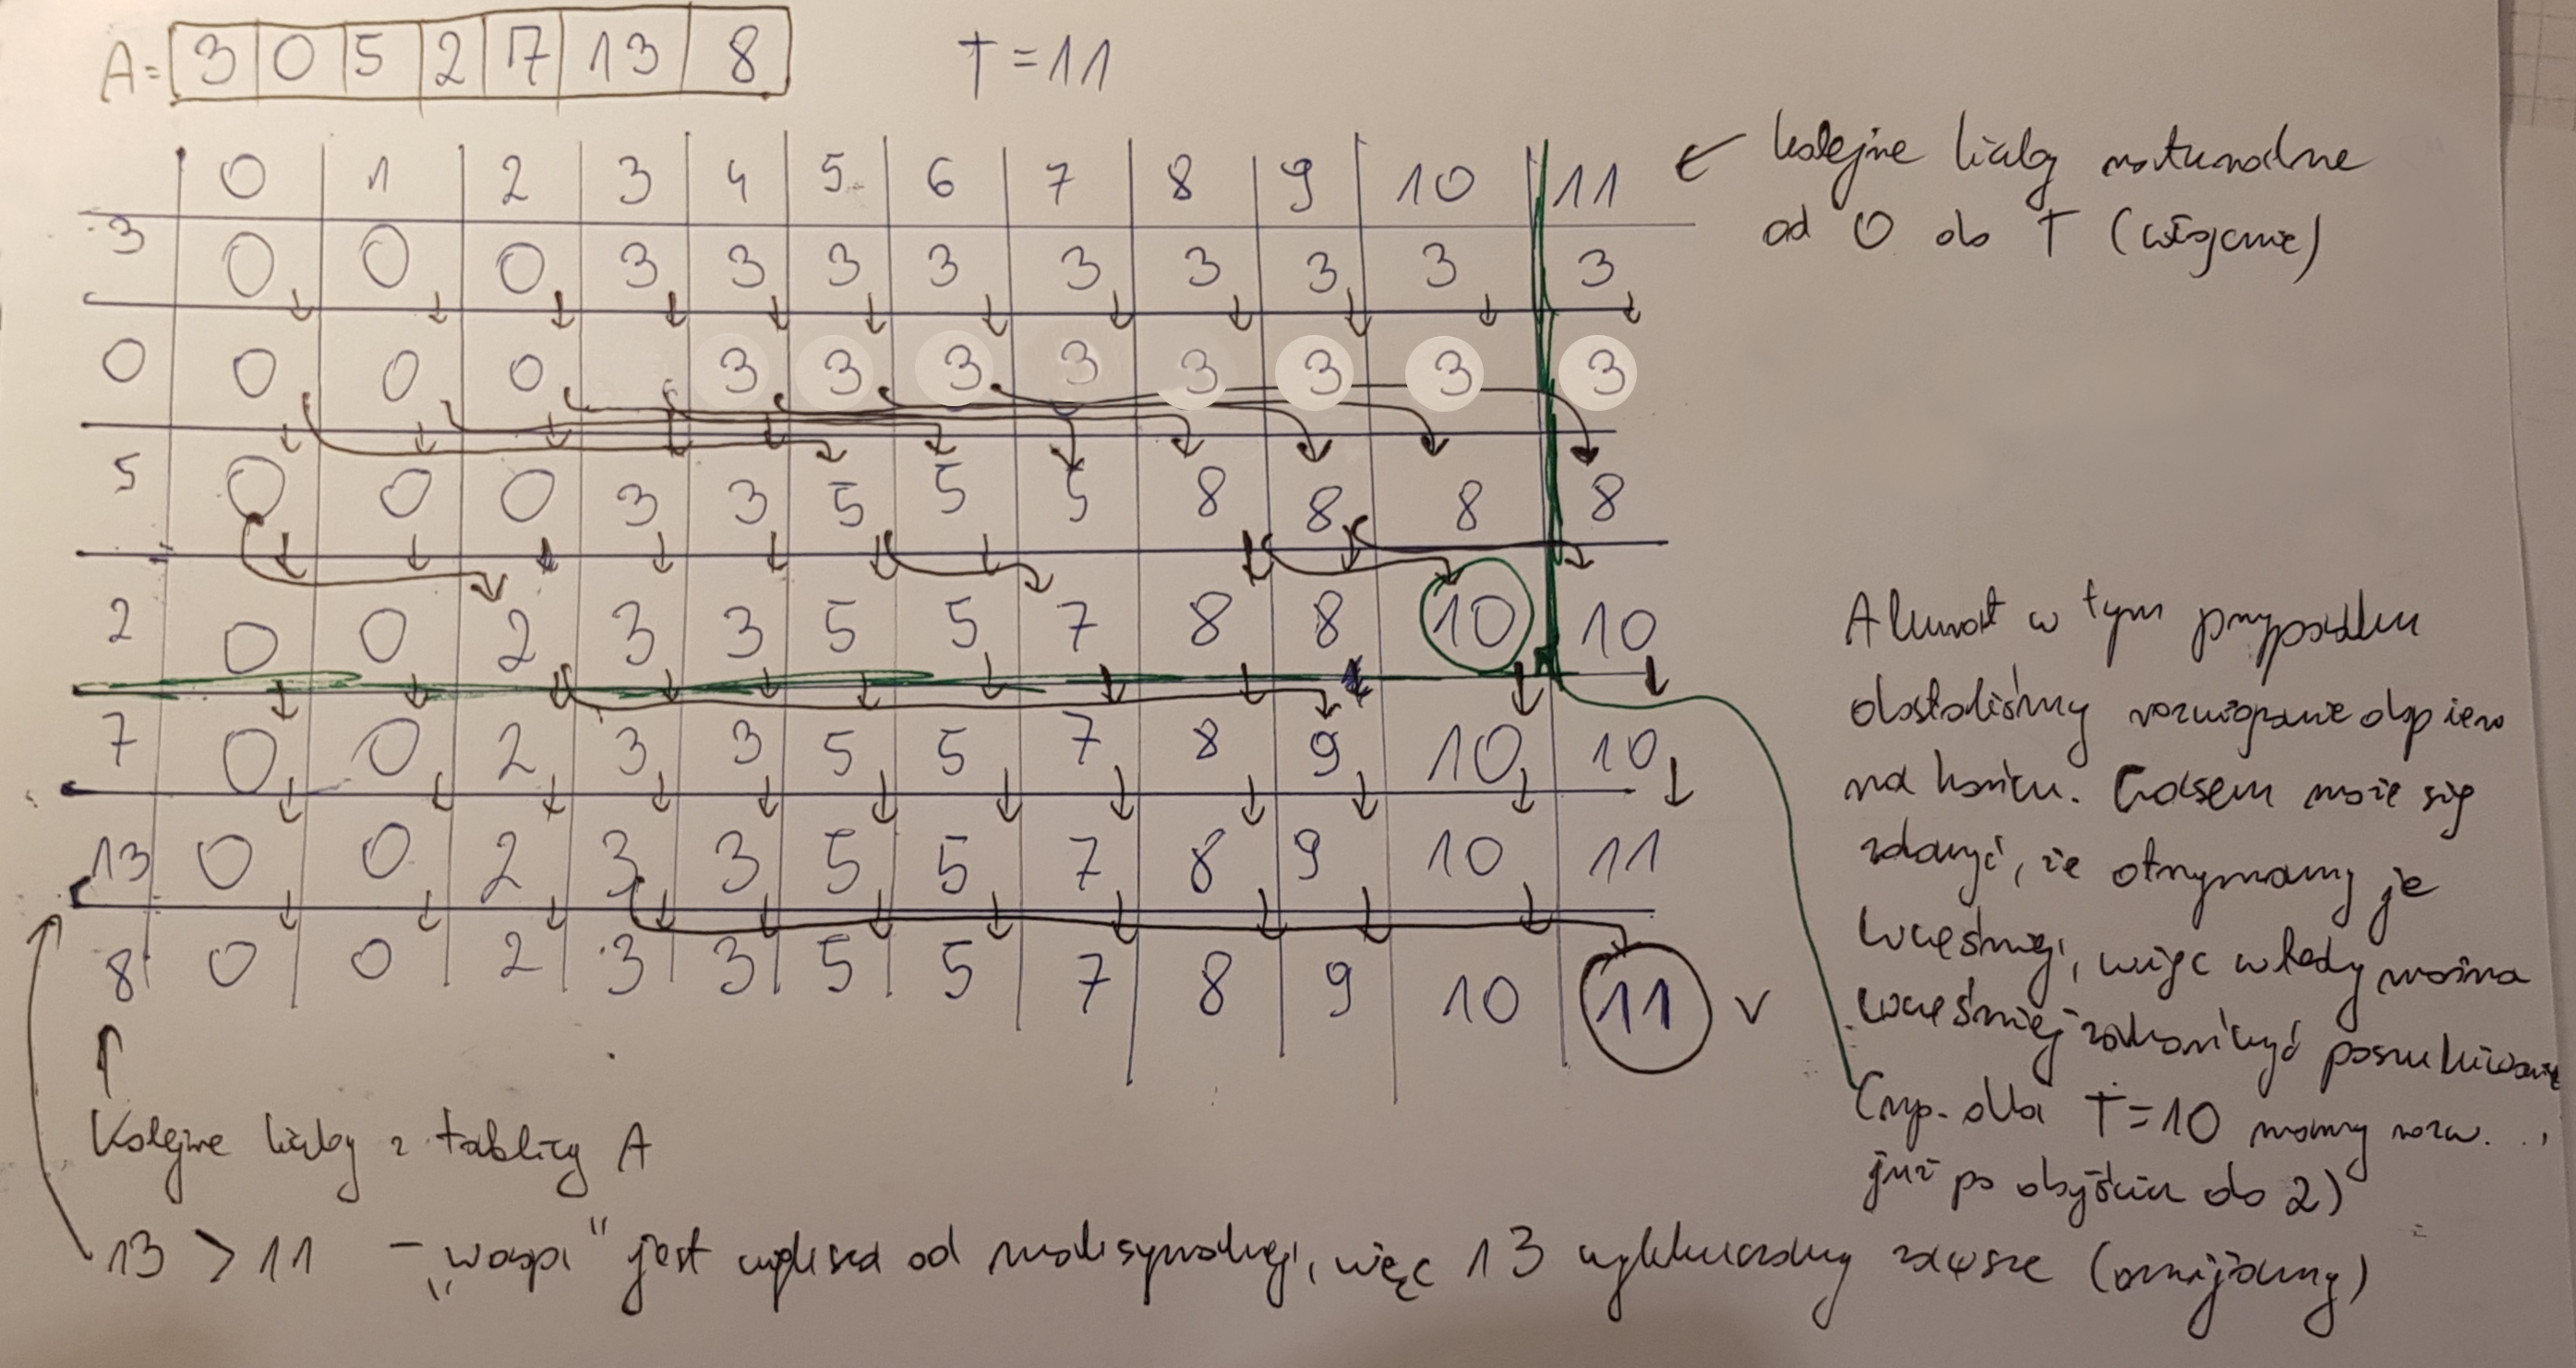

Jak widać, jeżeli pojawia się w ciągu 0, nie zmienia ono wyniku, więc niepotrzebnie przepisujemy wartości do kolejnego wiersza dla zera, bo w wierszu wyżej są identyczne. Dużo lepiej pominąć zera i nie tworzyć dla nich w ogóle wierszy w tablicy.

## Implementacja #1
#### Ze zoptymalizowaną pamięcią (Zabiera tyle, ile potrzeba. Jeżeli znajdzie szukaną sumę wcześniej, przerywa poszukiwanie.)

In [1]:
def sub_sum(A, T):
    if T < 0 or not A: return False
    if T < 2:
        for num in A:
            if num == T: return True
        return False
    
    # Filter zeros and excessive values out of the array as they don't change the sum
    # or cannot be taken and it is pointless to perform calculations for rows with them
    new_A = []
    for val in A:
        if 0 < val <= T:
            new_A.append(val)
    A = new_A
    
    n = len(A)
    F = [[0] * (T + 1) for _ in range(2)]
    # Fill the first row of a 2-dimensional array
    for i in range(A[0], T + 1):
        F[0][i] = A[0]
    # Fill a 2-dimensional array using bottom-up approach
    for i in range(1, n):
        # Add the next row if still sum hasn't been found
        if i == len(F):
            F.append([0] * (T + 1))
        # Update values in a row
        for w in range(1, T + 1):
            F[i][w] = F[i - 1][w]
            if w >= A[i]:  # A[i] is also a weight
                F[i][w] = max(F[i][w], F[i - 1][w - A[i]] + A[i])
            if F[i][w] == T: 
                print(*F, sep='\n')
                return True
            
    print(*F, sep='\n')
    return False

###### Kilka testów

In [2]:
A = [3, 0, 5, 2, 7, 13, 8]
T = 10

print(sub_sum(A, T))

[0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 3, 3, 5, 5, 5, 8, 8, 8]
[0, 0, 2, 3, 3, 5, 5, 7, 8, 8, 10]
True


## Implementacja #2
#### Ze sztywno ustaloną tablicą, na której pracujemy.

In [3]:
def sub_sum(A, T):
    if T < 0 or not A: return False
    if T < 2:
        for num in A:
            if num == T: return True
        return False
    
    # Filter zeros and excessive values out of the array as they don't change the sum
    # or cannot be taken and it is pointless to perform calculations for rows with them
    new_A = []
    for val in A:
        if 0 < val <= T:
            new_A.append(val)
    A = new_A
    
    n = len(A)
    F = [[0] * (T + 1) for _ in range(n)]
    # Fill the first row of a 2-dimensional array
    for i in range(A[0], T + 1):
        F[0][i] = A[0]
    # Fill a 2-dimensional array using bottom-up approach
    for i in range(1, n):
        # Update values in a row
        for w in range(1, T + 1):
            F[i][w] = F[i - 1][w]
            if w >= A[i]:  # A[i] is also a weight
                F[i][w] = max(F[i][w], F[i - 1][w - A[i]] + A[i])
            if F[i][w] == T: 
                print(*F, sep='\n')
                return True
            
    print(*F, sep='\n')
    return False

###### Kilka testów

In [4]:
A = [3, 0, 5, 2, 7, 13, 8]
T = 10

print(sub_sum(A, T))

[0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 3, 3, 5, 5, 5, 8, 8, 8]
[0, 0, 2, 3, 3, 5, 5, 7, 8, 8, 10]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True


## Dodatkowo: wypisywanie znalezionego podciągu

## Implementacja #1
#### Dla pierwszej imlementacji algorytmu 

Konieczne jest zmodyfikowanie wcześniejszego algorytmu tak, aby zwracał tablicę, na której pracował.
###### UWAGA:
Tym razem zakładamy, że nie ma zer. Jeżeli są zera, dostajemy błędny wynik.

In [5]:
def sub_sum(A, T):
    if T < 0 or not A: return False, []
    
    n = len(A)
    F = [[0] * (T + 1) for _ in range(2)]
    # Fill the first row of a 2-dimensional array
    for i in range(A[0], T + 1):
        F[0][i] = A[0]
    # Fill a 2-dimensional array using bottom-up approach
    for i in range(1, n):
        # Add the next row if still sum hasn't been found
        if i == len(F):
            F.append([0] * (T + 1))
        # Update values in a row
        for w in range(1, T + 1):
            F[i][w] = F[i - 1][w]
            if w >= A[i]:  # A[i] is also a weight
                F[i][w] = max(F[i][w], F[i - 1][w - A[i]] + A[i])
            if F[i][w] == T: 
                return True, F
            
    return False, F

In [6]:
def get_sub(F, A, T):
    if not F or F[-1][-1] != T: return []
    contents = []
    w = len(F[0]) - 1
    for i in range(len(F)-1, 0, -1):
        # If we have taken an item from the 'i'th row, a sum stored
        # in this row will be different than a sum in a row above
        if F[i][w] != F[i - 1][w]:
            # We take this item to the subsequence and reduce the remaining
            # sum so we have to decrease a value of a column pointer 'w'
            contents.append(A[i])  # Change to 'i' if want indices of elements
            w -= A[i]
    # As we will never check the first row in a loop above, we have
    # to asses whether the item from the first row was taken separately
    # We decide to take the first element only there is still some value
    # remaining
    if w > 0: contents.append(A[0])  # Change to '0' if want indices of elements
    
    # Reverse the result array as we get indices in a reversed order
    for i in range(len(contents) // 2):
        swap(contents, i, -i-1)
    
    return contents


def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [7]:
A = [3, 5, 2, 7, 13, 8]
T = 10
# T = -1
A = [0]

res, F = sub_sum(A, T)
print(*F, sep='\n')
print(res)
print(get_sub(F, A, T))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
False
[]


## Implementacja #2
#### Rekurencyjna dla pierwszej implementacji algorytmu

In [8]:
def get_sub(F, A, T):
    if not F or F[-1][-1] != T: return []
    return _get_sub(F, A, len(F) - 1, len(F[0]) -1)

def _get_sub(F, A, i, w):
    if i < 0: return []
    if i == 0: return [A[0]] if w >= A[0] else []  # <-- Replace to [i] if want indices not values
    if w >= A[0] and F[i][w] == F[i - 1][w - A[i]] + A[i]:
        return _get_sub(F, A, i - 1, w - A[i]) + [A[i]]  # <-- Replace to [i] if want indices not values
    return _get_sub(F, A, i - 1, w)

###### Kilka testów

In [9]:
A = [3, 5, 2, 7, 13, 8]
T = 10
# T = -1
A = [0]

res, F = sub_sum(A, T)
print(*F, sep='\n')
print(res)
print(get_sub(F, A, T))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
False
[]


## Implementacja #3
#### Dla drugiej implementacji algorytmu 

Konieczne jest zmodyfikowanie wcześniejszego algorytmu tak, aby zwracał tablicę, na której pracował.
###### UWAGA:
Tym razem zakładamy, że nie ma zer. Jeżeli są zera, dostajemy błędny wynik.

In [10]:
def sub_sum(A, T):
    if T < 0 or not A: return False, []
    
    n = len(A)
    F = [[0] * (T + 1) for _ in range(n)]
    # Fill the first row of a 2-dimensional array
    for i in range(A[0], T + 1):
        F[0][i] = A[0]
    # Fill a 2-dimensional array using bottom-up approach
    for i in range(1, n):
        # Update values in a row
        for w in range(1, T + 1):
            F[i][w] = F[i - 1][w]
            if w >= A[i]:  # A[i] is also a weight
                F[i][w] = max(F[i][w], F[i - 1][w - A[i]] + A[i])
            if F[i][w] == T: 
                return True, F
            
    return False, F

In [11]:
def get_sub(F, A, T):
    if not F or F[0][-1] == 0: return []
    
    contents = []
    w = len(F[0]) - 1
    
    i = len(F) - 1
    while F[i][w] == 0: i -= 1
    if F[i][w] != T: return []
    
    for i in range(i, 0, -1):
        # If we have taken an item from the 'i'th row, a sum stored
        # in this row will be different than a sum in a row above
        if F[i][w] != F[i - 1][w]:
            # We take this item to the subsequence and reduce the remaining
            # sum so we have to decrease a value of a column pointer 'w'
            contents.append(A[i])  # Change to 'i' if want indices of elements
            w -= A[i]
    # As we will never check the first row in a loop above, we have
    # to asses whether the item from the first row was taken separately
    # We decide to take the first element only there is still some value
    # remaining
    if w > 0: contents.append(A[0])  # Change to '0' if want indices of elements
    
    # Reverse the result array as we get indices in a reversed order
    for i in range(len(contents) // 2):
        swap(contents, i, -i-1)
    
    return contents


def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [12]:
A = [1, 3, 5, 2, 7, 13, 8]
A = [1, 1, 1, 3, 5, 2, 1, 1, 1, 7, 1, 1, 1, 1, 13, 8]
# A = [0, 2, 4]
T = 10

res, F = sub_sum(A, T)
print(*F, sep='\n')
print(res)
print(get_sub(F, A, T))

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 1, 2, 3, 4, 5, 6, 6, 6, 6, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True
[1, 1, 3, 5]
